In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 

In [3]:
age_raw = 'Resources/Age_Data.csv'
age_data = pd.read_csv(age_raw)
age_data.head()

,Unnamed: 0,Year,City,Age Range,Number in Range
0,0,2018,"Albany, NY",18 to 24 Years,21091
1,1,2018,"Albany, NY",75 Years & Over,5906
2,2,2018,"Albany, NY",45 to 54 Years,10514
3,3,2018,"Albany, NY",Under 5 Years,5491
4,4,2018,"Albany, NY",65 to 74 Years,6670


In [4]:
income_raw = 'Resources/Income_data.csv'
income_data = pd.read_csv(income_raw)
income_data = income_data[['Year', 'City', 'Median Income']]
income_data.head()

,Year,City,Median Income
0,2018,"Albany, NY",45500
1,2017,"Albany, NY",43790
2,2016,"Albany, NY",42335
3,2015,"Albany, NY",40949
4,2014,"Albany, NY",41099


In [5]:
avacado_raw = 'Resources/clean_avocado.csv'
avacado_data = pd.read_csv(avacado_raw)
avacado_data['region'].unique()

array(['Albany', 'Atlanta', 'Boise', 'Boston', 'California', 'Charlotte',
       'Chicago', 'Columbus', 'Denver', 'Detroit', 'Grand Rapids',
       'Great Lakes', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Midsouth', 'Nashville',
       'New York', 'Northern New England', 'Orlando', 'Philadelphia',
       'Pittsburgh', 'Plains', 'Portland', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'Spokane', 'St. Louis', 'Syracuse', 'Tampa'], dtype=object)

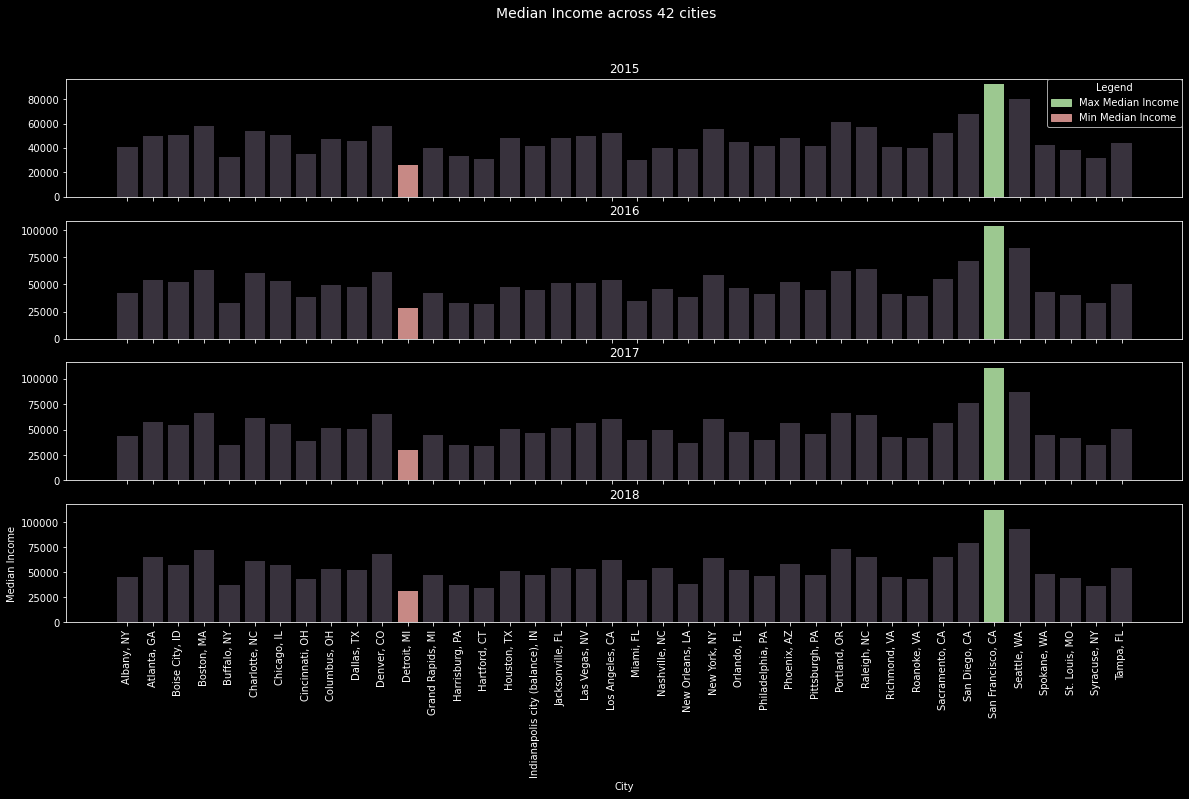

In [221]:
import matplotlib.patches as mpatches

#setup Groupbys, max, and min
income_groupby = income_data.copy().loc[income_data['Year'] >= 2015]
income_groupby = income_groupby.groupby(['Year', 'City', 'Median Income']).sum().reset_index().pivot(index='City', columns='Year').reset_index()
income_groupby.columns = ['City', '2015','2016', '2017', '2018']

income_max = income_data.copy().loc[income_data['Year'] >= 2015]
income_max = income_max.drop_duplicates().groupby(['Year'])['Median Income'].max().reset_index()
income_max = pd.merge(income_max, income_data.copy(), on=['Year', 'Median Income'], how='left').drop_duplicates().pivot(index='City', columns='Year').reset_index()
income_max.columns = ['City', '2015','2016', '2017', '2018']

income_min = income_data.copy().loc[income_data['Year'] >= 2015]
income_min = income_min.drop_duplicates().groupby(['Year'])['Median Income'].min().reset_index()
income_min = pd.merge(income_min, income_data.copy(), on=['Year', 'Median Income'], how='left').drop_duplicates().pivot(index='City', columns='Year').reset_index()
income_min.columns = ['City', '2015','2016', '2017', '2018']

#make plot fig
plt.rcParams['figure.figsize']=(20,10)
#set axis
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
#plot axis
ax1.bar(income_groupby['City'], income_groupby['2015'], color='#71647A', alpha=.5)
ax1.bar(income_max['City'], income_max['2015'], color = '#9CC890')
ax1.bar(income_min['City'], income_min['2015'], color= '#C78985')
ax1.set_title('2015')

ax2.bar(income_groupby['City'], income_groupby['2016'], color='#71647A', alpha=.5)
ax2.bar(income_max['City'], income_max['2016'], color = '#9CC890')
ax2.bar(income_min['City'], income_min['2016'],color= '#C78985')
ax2.set_title('2016')

ax3.bar(income_groupby['City'], income_groupby['2017'], color='#71647A', alpha=.5)
ax3.bar(income_max['City'], income_max['2017'], color = '#9CC890')
ax3.bar(income_min['City'], income_min['2017'],color= '#C78985')
ax3.set_title('2017')

ax4.bar(income_groupby['City'], income_groupby['2018'], color='#71647A', alpha=.5)
ax4.bar(income_max['City'], income_max['2018'], color = '#9CC890')
ax4.bar(income_min['City'], income_min['2018'],color= '#C78985')
ax4.set_title('2018')

#legend, formatting, etc.
max_patch = mpatches.Patch(color='#9CC890', label='Max Median Income')
min_patch = mpatches.Patch(color='#C78985', label='Min Median Income')
ax1.legend(title='Legend', handles = [max_patch, min_patch], loc='upper right', fancybox=True, borderaxespad=0)

plt.ylabel('Median Income')
plt.xlabel('City')
plt.xticks( rotation=90)
plt.suptitle("Median Income across 42 cities", fontsize=14)


plt.show()

In [156]:
millenials = age_data.copy()
millenials['Millenials'] = np.where((millenials['Age Range'] == '18 to 24 Years') | (millenials['Age Range'] == '25 to 34 Years'), 'Millenial', 'Other')
millenials = millenials.loc[millenials["Year"] >= 2015]

millenials

,Unnamed: 0,Year,City,Age Range,Number in Range,Millenials
0,0,2018,"Albany, NY",18 to 24 Years,21091,Millenial
1,1,2018,"Albany, NY",75 Years & Over,5906,Other
2,2,2018,"Albany, NY",45 to 54 Years,10514,Other
3,3,2018,"Albany, NY",Under 5 Years,5491,Other
4,4,2018,"Albany, NY",65 to 74 Years,6670,Other
...,...,...,...,...,...,...
16209,16209,2015,"Tampa, FL",Under 5 Years,22686,Other
16210,16210,2015,"Tampa, FL",5 to 17 Years,57889,Other
16211,16211,2015,"Tampa, FL",45 to 54 Years,50313,Other
16212,16212,2015,"Tampa, FL",62 to 64 Years,10131,Other


In [200]:
age_groupby = millenials.groupby(['Year', 'City', 'Millenials'])['Number in Range'].sum()
age_groupby = age_groupby.reset_index().pivot_table(index=['City', ], columns=['Year', 'Millenials'], values='Number in Range').reset_index()
age_groupby.columns = ['City', '2015 Millenials', '2015 Other','2016 Millenials', '2016 Other', '2017 Millenials', '2017 Other', '2018 Millenials', '2018 Other']

years = [2015, 2016, 2017, 2018]

for year in years:
    age_groupby['{} %'.format(year)] = (age_groupby['{} Millenials'.format(year)]/(age_groupby['{} Millenials'.format(year)]+age_groupby['{} Other'.format(year)]))*100
    age_groupby['{} %'.format(year)] = age_groupby['{} %'.format(year)].map("{:,.1f}%".format)


age_groupby

,City,2015 Millenials,2015 Other,2016 Millenials,2016 Other,2017 Millenials,2017 Other,2018 Millenials,2018 Other,2015 %,2016 %,2017 %,2018 %
0,"Albany, NY",227772,363036,229644,360906,229002,361986,222252,365082,38.6%,38.9%,38.7%,37.8%
1,"Atlanta, GA",1900956,3665544,1946028,3724044,1989348,3846240,2070720,3906156,34.1%,34.3%,34.1%,34.6%
2,"Boise City, ID",338994,946182,343404,968658,346806,978348,350838,994962,26.4%,26.2%,26.2%,26.1%
3,"Boston, MA",1563882,2452932,1588302,2448738,1609842,2488248,1646658,2528898,38.9%,39.3%,39.3%,39.4%
4,"Buffalo, NY",458418,1089978,471624,1069824,480234,1071318,455544,1082388,29.6%,30.6%,31.0%,29.6%
5,"Charlotte, NC",1358214,3604512,1375536,3676638,1438044,3716268,1442820,3792216,27.4%,27.2%,27.9%,27.6%
6,"Chicago, IL",4898166,11425170,4845486,11384304,4891938,11406834,4838478,11397450,30.0%,29.9%,30.0%,29.8%
7,"Cincinnati, OH",569778,1221444,574272,1218540,583086,1224744,582360,1233330,31.8%,32.0%,32.3%,32.1%
8,"Columbus, OH",1645782,3448620,1657596,3518262,1697934,3593472,1739790,3635472,32.3%,32.0%,32.1%,32.4%
9,"Dallas, TX",2198568,5601924,2282286,5625366,2355684,5690934,2273364,5797092,28.2%,28.9%,29.3%,28.2%


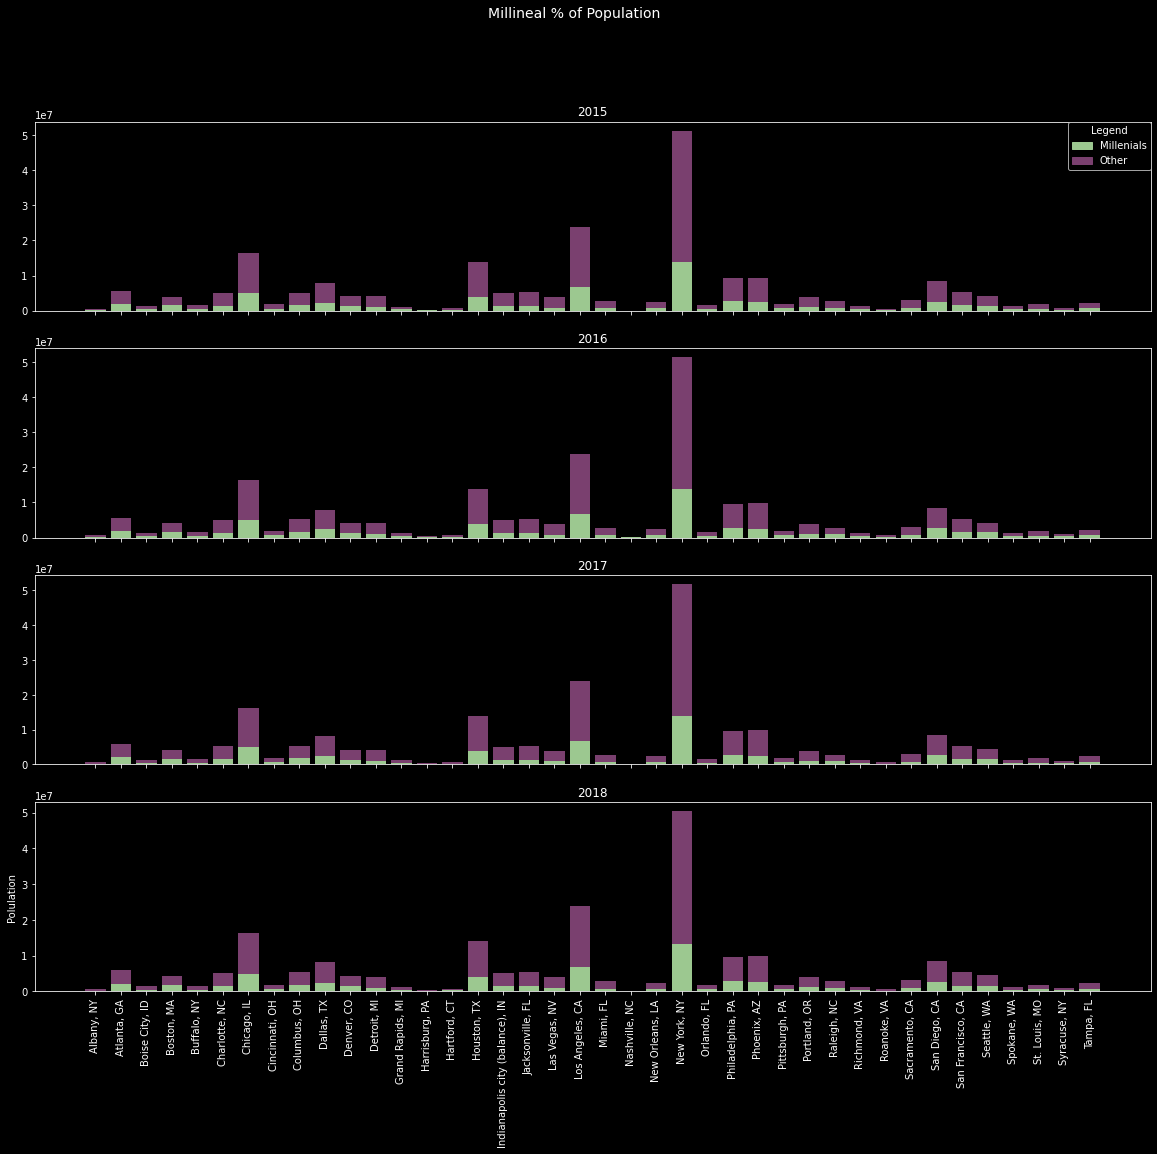

In [227]:
plt.rcParams['figure.figsize']=(20,16)

fig2, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
ax1.bar(age_groupby['City'],age_groupby['2015 Millenials'], color = '#9CC890' )
ax1.bar(age_groupby['City'],age_groupby['2015 Other'], bottom=age_groupby['2015 Millenials'], color='#7A406F')
ax1.set_title('2015')

ax2.bar(age_groupby['City'],age_groupby['2016 Millenials'], color = '#9CC890' )
ax2.bar(age_groupby['City'],age_groupby['2016 Other'], bottom=age_groupby['2016 Millenials'], color='#7A406F')
ax2.set_title('2016')

ax3.bar(age_groupby['City'],age_groupby['2017 Millenials'], color = '#9CC890' )
ax3.bar(age_groupby['City'],age_groupby['2017 Other'], bottom=age_groupby['2017 Millenials'], color='#7A406F')
ax3.set_title('2017')

ax4.bar(age_groupby['City'],age_groupby['2018 Millenials'], color = '#9CC890' )
ax4.bar(age_groupby['City'],age_groupby['2018 Other'], bottom=age_groupby['2018 Millenials'], color='#7A406F')
ax4.set_title('2018')

mil_patch = mpatches.Patch(color='#9CC890', label='Millenials')
non_mil_patch = mpatches.Patch(color='#7A406F', label='Other')
ax1.legend(title='Legend', handles = [mil_patch, non_mil_patch], loc='upper right', fancybox=True, borderaxespad=0)


plt.xticks(rotation=90)
plt.suptitle("Millineal % of Population", fontsize=14)
plt.ylabel('Polulation')
plt.show()